In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news_summary_more.csv
/kaggle/input/news_summary.csv


In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

# from summarizer import Summarizer,TransformerSummarizer
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
summary = pd.read_csv('/kaggle/input/news_summary.csv', encoding='iso-8859-1')
raw = pd.read_csv('/kaggle/input/news_summary_more.csv', encoding='iso-8859-1')

In [4]:
pd.set_option('display.max_colwidth', None)

In [5]:
raw.head()

,headlines,text
0,upGrad learner switches to career in ML & Al with 90% salary hike,"Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers."
1,Delhi techie wins free food from Swiggy for one year on CRED,"Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coins. Users get one CRED coin per rupee of bill paid, which can be used to avail rewards from brands like Ixigo, BookMyShow, UberEats, Cult.Fit and more."
2,New Zealand end Rohit Sharma-led India's 12-match winning streak,"New Zealand defeated India by 8 wickets in the fourth ODI at Hamilton on Thursday to win their first match of the five-match ODI series. India lost an international match under Rohit Sharma's captaincy after 12 consecutive victories dating back to March 2018. The match witnessed India getting all out for 92, their seventh lowest total in ODI cricket history."
3,Aegon life iTerm insurance plan helps customers save tax,"With Aegon Life iTerm Insurance plan, customers can enjoy tax benefits on your premiums paid and save up to Ã¢ÂÂ¹46,800^ on taxes. The plan provides life cover up to the age of 100 years. Also, customers have options to insure against Critical Illnesses, Disability and Accidental Death Benefit Rider with a life cover up to the age of 80 years."
4,"Have known Hirani for yrs, what if MeToo claims are not true: Sonam","Speaking about the sexual harassment allegations against Rajkumar Hirani, Sonam Kapoor said, ""I've known Hirani for many years...What if it's not true, the [#MeToo] movement will get derailed."" ""In the #MeToo movement, I always believe a woman. But in this case, we need to reserve our judgment,"" she added. Hirani has been accused by an assistant who worked in 'Sanju'."


In [6]:
pre1 =  raw.iloc[:,0:2].copy()
pre2 = summary.iloc[:,0:6].copy()

In [7]:
pre1.head() 

,headlines,text
0,upGrad learner switches to career in ML & Al with 90% salary hike,"Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers."
1,Delhi techie wins free food from Swiggy for one year on CRED,"Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coins. Users get one CRED coin per rupee of bill paid, which can be used to avail rewards from brands like Ixigo, BookMyShow, UberEats, Cult.Fit and more."
2,New Zealand end Rohit Sharma-led India's 12-match winning streak,"New Zealand defeated India by 8 wickets in the fourth ODI at Hamilton on Thursday to win their first match of the five-match ODI series. India lost an international match under Rohit Sharma's captaincy after 12 consecutive victories dating back to March 2018. The match witnessed India getting all out for 92, their seventh lowest total in ODI cricket history."
3,Aegon life iTerm insurance plan helps customers save tax,"With Aegon Life iTerm Insurance plan, customers can enjoy tax benefits on your premiums paid and save up to Ã¢ÂÂ¹46,800^ on taxes. The plan provides life cover up to the age of 100 years. Also, customers have options to insure against Critical Illnesses, Disability and Accidental Death Benefit Rider with a life cover up to the age of 80 years."
4,"Have known Hirani for yrs, what if MeToo claims are not true: Sonam","Speaking about the sexual harassment allegations against Rajkumar Hirani, Sonam Kapoor said, ""I've known Hirani for many years...What if it's not true, the [#MeToo] movement will get derailed."" ""In the #MeToo movement, I always believe a woman. But in this case, we need to reserve our judgment,"" she added. Hirani has been accused by an assistant who worked in 'Sanju'."


In [8]:
pre = pd.DataFrame()
pre['text'] = pd.concat([pre1['text'], pre2['text']], ignore_index=True)
pre['headlines'] = pd.concat([pre1['headlines'],pre2['headlines']],ignore_index = True)

In [9]:
pre.head(2)

,text,headlines
0,"Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers.",upGrad learner switches to career in ML & Al with 90% salary hike
1,"Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coins. Users get one CRED coin per rupee of bill paid, which can be used to avail rewards from brands like Ixigo, BookMyShow, UberEats, Cult.Fit and more.",Delhi techie wins free food from Swiggy for one year on CRED


### Concatenated text and headlines from both the datasets. Now,we will use the text column to predict the headline 

In [10]:
import unicodedata
import re

In [11]:
def preprocess(text):
    """Preprocess the given text."""
    
    # Encode to ascii
    text = ''.join(
        c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn'
    )
    
    # To lowercase
    text = text.lower()

    text = re.sub("(\\t)", ' ', text)  #remove escape charecters
    text = re.sub("(\\r)", ' ', text)
    text = re.sub("(\\n)", ' ', text)
    text = re.sub("(__+)", ' ', text)   #remove _ if it occors more than one time consecutively
    text = re.sub("(--+)", ' ', text)   #remove - if it occors more than one time consecutively
    text = re.sub("(~~+)", ' ', text)   #remove ~ if it occors more than one time consecutively
    text = re.sub("(\+\++)", ' ', text)   #remove + if it occors more than one time consecutively
    text = re.sub("(\.\.+)", ' ', text)   #remove . if it occors more than one time consecutively
    text = re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", ' ', text) #remove <>()|&©ø"',;?~*!
    text = re.sub("(mailto:)", ' ', text)  #remove mailto:
    text = re.sub(r"(\\x9\d)", ' ', text)  #remove \x9* in text
    text = re.sub("([iI][nN][cC]\d+)", 'INC_NUM', text)  #replace INC nums to INC_NUM
    text = re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", 'CM_NUM', text)  #replace CM# and CHG# to CM_NUM
    text = re.sub("(\.\s+)", ' ', text)  #remove full stop at end of words(not between)
    text = re.sub("(\-\s+)", ' ', text)  #remove - at end of words(not between)
    text = re.sub("(\:\s+)", ' ', text)  #remove : at end of words(not between)
    text = re.sub("(\s+.\s+)", ' ', text)  #remove any single charecters hanging between 2 spaces

    #Replace any url as such https://abc.xyz.net/browse/sdf-5327 ====> abc.xyz.net
    try:
        url = re.search(r'((https*:\/*)([^\/\s]+))(.[^\s]+)', text)
        repl_url = url.group(3)
        text = re.sub(r'((https*:\/*)([^\/\s]+))(.[^\s]+)',repl_url, text)
    except:
        pass #there might be emails with no url in them

    text = re.sub("(\s+)",' ',text) #remove multiple spaces
    text = re.sub("(\s+.\s+)", ' ', text) #remove any single charecters hanging between 2 spaces
    return text

In [12]:
%%time
pre['headlines'] = pre['headlines'].apply(preprocess)
pre['text'] = pre['text'].apply(preprocess)

CPU times: user 35.3 s, sys: 31 ms, total: 35.4 s
Wall time: 35.4 s


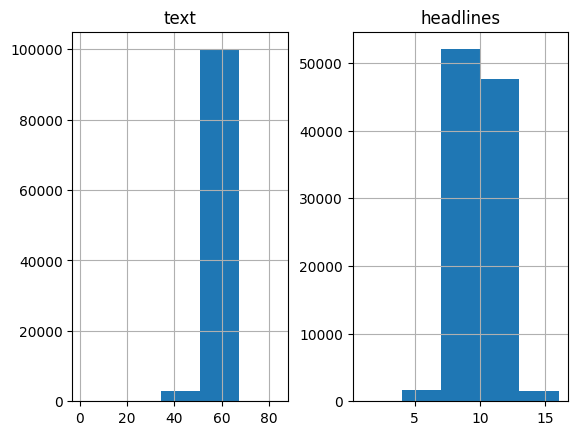

In [13]:
text_count = []
headlines_count = []

for sent in pre['text']:
    text_count.append(len(sent.split()))
for sent in pre['headlines']:
    headlines_count.append(len(sent.split()))

graph_df= pd.DataFrame()
graph_df['text']=text_count
graph_df['headlines']=headlines_count

import matplotlib.pyplot as plt

graph_df.hist(bins = 5)
plt.show()

In [14]:
#Check how much % of summary have 0-15 words
cnt=0
for i in pre['headlines']:
    if(len(i.split())<=15):
        cnt=cnt+1
print('for headlines:',cnt/len(pre['headlines']))


#Check how much % of text have 0-70 words
cnt=0
for i in pre['text']:
    if(len(i.split())<=100):
        cnt=cnt+1
print('for text:',cnt/len(pre['text']))


for headlines: 0.9999805664869067
for text: 1.0


In [15]:
#Model to summarize the text between 0-15 words for Summary and 0-100 words for Text
max_text_len=100
max_headline_len=15

In [16]:
pre.head()

,text,headlines
0,saurav kant an alumnus of upgrad and iiit-b pg program in machine learning and artificial intelligence was sr systems engineer at infosys with almost years of work experience the program and upgrad 360-degree career support helped him transition to data scientist at tech mahindra with 90% salary hike upgrad online power learning has powered lakh+ careers.,upgrad learner switches to career in ml al with 90% salary hike
1,kunal shah credit card bill payment platform cred gave users chance to win free food from swiggy for one year pranav kaushik delhi techie bagged this reward after spending 2000 cred coins users get one cred coin per rupee of bill paid which can be used to avail rewards from brands like ixigo bookmyshow ubereats cult.fit and more.,delhi techie wins free food from swiggy for one year on cred
2,new zealand defeated india by wickets in the fourth odi at hamilton on thursday to win their first match of the five-match odi series india lost an international match under rohit sharma captaincy after 12 consecutive victories dating back to march 2018 the match witnessed india getting all out for 92 their seventh lowest total in odi cricket history.,new zealand end rohit sharma-led india 12-match winning streak
3,with aegon life iterm insurance plan customers can enjoy tax benefits on your premiums paid and save up to a¢aa¹46 800^ on taxes the plan provides life cover up to the age of 100 years also customers have options to insure against critical illnesses disability and accidental death benefit rider with life cover up to the age of 80 years.,aegon life iterm insurance plan helps customers save tax
4,speaking about the sexual harassment allegations against rajkumar hirani sonam kapoor said ve known hirani for many years what if it not true the #metoo movement will get derailed in the #metoo movement always believe woman but in this case we need to reserve our judgment she added hirani has been accused by an assistant who worked in sanju .,have known hirani for yrs what if metoo claims are not true sonam


### Preparing data for simplet5 model 

In [17]:
# simpleT5 expects dataframe to have 2 columns: "source_text" and "target_text"
df_t5 = pre.rename(columns={"headlines":"target_text", "text":"source_text"})
df_t5 = df_t5[['source_text', 'target_text']]

In [18]:
def print_head(limit=5):
    for idx in range(limit):
        print(f'HEADLINE: {pre["headlines"][idx]}\nTEXT: {pre["text"][idx]}\n')
print_head()

HEADLINE: upgrad learner switches to career in ml al with 90% salary hike
TEXT: saurav kant an alumnus of upgrad and iiit-b pg program in machine learning and artificial intelligence was sr systems engineer at infosys with almost years of work experience the program and upgrad 360-degree career support helped him transition to data scientist at tech mahindra with 90% salary hike upgrad online power learning has powered lakh+ careers.

HEADLINE: delhi techie wins free food from swiggy for one year on cred
TEXT: kunal shah credit card bill payment platform cred gave users chance to win free food from swiggy for one year pranav kaushik delhi techie bagged this reward after spending 2000 cred coins users get one cred coin per rupee of bill paid which can be used to avail rewards from brands like ixigo bookmyshow ubereats cult.fit and more.

HEADLINE: new zealand end rohit sharma-led india 12-match winning streak
TEXT: new zealand defeated india by wickets in the fourth odi at hamilton on t

In [19]:
train_size = 70000
valid_size = 10000
test_size = 1000

In [20]:
train_df = df_t5[: train_size]
valid_df = df_t5[train_size : train_size + valid_size]
test_df = df_t5[train_size + valid_size : train_size + valid_size + test_size]
print("train data shape is: ", train_df.shape)
print("valid data shape is: ", valid_df.shape)
print("test data shape is: ", test_df.shape)

train data shape is:  (70000, 2)
valid data shape is:  (10000, 2)
test data shape is:  (1000, 2)


In [21]:
train_df.head(1)

,source_text,target_text
0,saurav kant an alumnus of upgrad and iiit-b pg program in machine learning and artificial intelligence was sr systems engineer at infosys with almost years of work experience the program and upgrad 360-degree career support helped him transition to data scientist at tech mahindra with 90% salary hike upgrad online power learning has powered lakh+ careers.,upgrad learner switches to career in ml al with 90% salary hike


In [22]:
valid_df.head(1)

,source_text,target_text
70000,the delhi government will reportedly conduct tests for 400 mbbs doctors performing ultrasounds in the city in the coming months doctors failing the test will undergo six-month training at government-recognised institutions only doctors specialised in radiology should perform ultrasound for the mbbs doctors the six-month training is actually mandated health department official said.,doctors in delhi must pass test to perform ultrasound govt


In [23]:
test_df.head(1)

,source_text,target_text
80000,the season premiere of hbo game of thrones became the most watched in the show history with 10.1 million viewers tuning in to the live broadcast as per hbo this season first episode beat viewership for last year season finale which had 8.89 million viewers it was also the most tweeted got episode ever with 2.4 million tweets.,season premiere most watched got episode in showa¢aas history


In [24]:
!pip install simplet5

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 28.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.7/527.7 kB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 kB 52.2 MB/s eta 0:00:00
  Obtaining dependency information for sacremoses from https://files.pythonhosted.org/packages/0b/f0/89ee2bc9da434bd78464f288fdb346bc2932f2ee80a90b2a4bbbac262c74/sacremoses-0.1.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 55.3 MB/s eta 0:00:00
  Created wheel for simplet5: filename=simplet5-0.1.4-py3-none-any.whl size=6854 sha256=cb3b7c8923c1c3133731b7e2ca835de952f56c455d279c53f65a5f0a4b3d0cef
  Stored in directory: /root/.cache/pip/wheels/b4/7d/af/743765400878438a7593f13f89fdf4004dcde0f2a8e6cb6684
Successfully built simplet5
DEPRECATION: pytorch-lightning 1.5.10 has a non-standard dependency specifier torch>=1.7.*. pip 23.3 will enforce this behaviour chang

In [25]:
from simplet5 import SimpleT5

model = SimpleT5()
model.from_pretrained(model_type="t5", model_name="t5-base")

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.32M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/850M [00:00<?, ?B/s]

In [26]:
model.train(train_df=train_df[:10000],
            eval_df=valid_df[:2000], 
            source_max_token_len=128, 
            target_max_token_len=50, 
            batch_size=8, max_epochs=5, use_gpu=True)

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [27]:
! ( cd outputs; ls )

simplet5-epoch-0-train-loss-1.4496-val-loss-1.2572
simplet5-epoch-1-train-loss-1.1103-val-loss-1.2448
simplet5-epoch-2-train-loss-0.9202-val-loss-1.2768
simplet5-epoch-3-train-loss-0.7798-val-loss-1.327
simplet5-epoch-4-train-loss-0.6599-val-loss-1.3475


In [28]:
# let's load the trained model from the local output folder for inferencing:
model.load_model("t5","outputs/simplet5-epoch-4-train-loss-0.6599-val-loss-1.3475", use_gpu=True)

In [29]:
#src = https://www.thehindu.com/business/Industry/twitter-interim-grievance-officer-for-india-quits/article35004295.ece
text_to_summarize="""summarize: Twitter’s interim resident grievance officer for India has stepped down, leaving the micro-blogging site without a grievance official as mandated by the new IT rules to address complaints from Indian subscribers, according to a source.

The source said that Dharmendra Chatur, who was recently appointed as interim resident grievance officer for India by Twitter, has quit from the post.

The social media company’s website no longer displays his name, as required under Information Technology (Intermediary Guidelines and Digital Media Ethics Code) Rules 2021.

Twitter declined to comment on the development.

The development comes at a time when the micro-blogging platform has been engaged in a tussle with the Indian government over the new social media rules. The government has slammed Twitter for deliberate defiance and failure to comply with the country’s new IT rules.
"""
model.predict(text_to_summarize)

['twitter interim grievance officer for india quits site']

In [30]:
text_to_summarize="""summarize: Vaccination and safety measures such as wearing face masks are essential when it comes to fighting the Delta Plus coronavirus variant, World Health Organization (WHO) representative to Russia Melita Vujnovic said.

"Vaccination plus masks, because just a vaccine is not enough with 'Delta Plus'. We need to make an effort over a short period of time, otherwise there would be a lockdown," Vujnovic said on the Soloviev Live YouTube show.

She explained that vaccination is essential because it lowers the probability of spreading the virus and lowers the risks of severe disease. However, "additional measures" will probably be required as well, Vujnovic warned.

Earlier in June, the WHO included the Delta variant in its list of coronavirus variants of concern as the strain had become prevalent and has caused a resurgence of COVID-19 cases in some countries, including Russia. India has also reported multiple cases of the Delta Plus strain, which was first discovered in March.
"""
model.predict(text_to_summarize)

['wearing face masks essential to fight delta plus virus, who']

In [31]:
test_df.columns

Index(['source_text', 'target_text'], dtype='object')

In [32]:
df_temp=pd.DataFrame(test_df.head(100))
df_temp.shape

(100, 2)

In [33]:
df_temp['source_text'] = "summarize: " + df_temp['source_text']
df_temp.head()

,source_text,target_text
80000,summarize: the season premiere of hbo game of thrones became the most watched in the show history with 10.1 million viewers tuning in to the live broadcast as per hbo this season first episode beat viewership for last year season finale which had 8.89 million viewers it was also the most tweeted got episode ever with 2.4 million tweets.,season premiere most watched got episode in showa¢aas history
80001,summarize: president pranab mukherjee is entitled to salary of a¢aa¹75 000 per month half of his salary as president after he retires on july 24 he will further be entitled to office expenses of a¢aa¹60 000 per annum mobile phone car and free travel across india he will live in the delhi bungalow where former president dr apj abdul kalam stayed.,what will president pranab mukherjee earn post retirement
80002,summarize: singer ed sheeran deleted his twitter account on monday after announcing earlier this month that he taking break from the social media platform go on it and there nothing but people saying mean things he had said earlier notably the singer was trolled for his cameo appearance on sunday premiere episode of game of thrones season 7.,singer ed sheeran deletes his twitter account
80003,summarize: nawazuddin siddiqui while speaking about his tweet about being discriminated in the film industry on the basis of his skin colour said it was just reply to someone in the film industry nawazuddin further explained that his tweet was not directed towards the entire industry these things are there everywhere not just in bollywood he added.,was reply to someone siddiqui on tweet about skin colour
80004,summarize: twitter has deleted nearly 90 000 fake accounts after security researchers discovered massive pornographic botnet that was posting links to scam websites and offering online sex the fake profiles had pictures of females and each tweet included sexually explicit phrase prompting users to click on the accompanying url the accounts were reportedly able to attract over crore clicks.,twitter deletes 90 000 fake accounts that offered online sex


In [34]:
predictions = []
for value in df_temp['source_text']:
    # Predict using the model
    prediction = model.predict(value)
    
    # Append the prediction to the list
    predictions.append(' '.join(prediction))

# Add the predictions to the DataFrame as a new column
df_temp['predictions'] = predictions

In [35]:
df_temp.head()

,source_text,target_text,predictions
80000,summarize: the season premiere of hbo game of thrones became the most watched in the show history with 10.1 million viewers tuning in to the live broadcast as per hbo this season first episode beat viewership for last year season finale which had 8.89 million viewers it was also the most tweeted got episode ever with 2.4 million tweets.,season premiere most watched got episode in showa¢aas history,game of thrones season premiere most watched in show history
80001,summarize: president pranab mukherjee is entitled to salary of a¢aa¹75 000 per month half of his salary as president after he retires on july 24 he will further be entitled to office expenses of a¢aa¹60 000 per annum mobile phone car and free travel across india he will live in the delhi bungalow where former president dr apj abdul kalam stayed.,what will president pranab mukherjee earn post retirement,pranab mukherjee entitled to aaa175 000 monthly salary after retirement
80002,summarize: singer ed sheeran deleted his twitter account on monday after announcing earlier this month that he taking break from the social media platform go on it and there nothing but people saying mean things he had said earlier notably the singer was trolled for his cameo appearance on sunday premiere episode of game of thrones season 7.,singer ed sheeran deletes his twitter account,singer ed sheeran deletes twitter account after announcing break
80003,summarize: nawazuddin siddiqui while speaking about his tweet about being discriminated in the film industry on the basis of his skin colour said it was just reply to someone in the film industry nawazuddin further explained that his tweet was not directed towards the entire industry these things are there everywhere not just in bollywood he added.,was reply to someone siddiqui on tweet about skin colour,it was reply to someone in film industry nawazuddin on discrimination row
80004,summarize: twitter has deleted nearly 90 000 fake accounts after security researchers discovered massive pornographic botnet that was posting links to scam websites and offering online sex the fake profiles had pictures of females and each tweet included sexually explicit phrase prompting users to click on the accompanying url the accounts were reportedly able to attract over crore clicks.,twitter deletes 90 000 fake accounts that offered online sex,90 000 fake twitter accounts deleted after pornographic botnet


In [36]:
!pip install rouge-score

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24952 sha256=3b992d39890752637cb7f66430e09ebf544067a73b23800c5b6fd1ced3f106bf
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score
DEPRECATION: pytorch-lightning 1.5.10 has a non-standard dependency specifier torch>=1.7.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [37]:
from rouge_score import rouge_scorer
import pandas as pd


scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Calculate ROUGE scores for each pair of prediction and reference
rouge_scores = []
for pred, ref in zip(df_temp['predictions'],df_temp['target_text']):
    scores = scorer.score(pred, ref)
    rouge_scores.append(scores)

# Extract ROUGE scores
rouge_1_scores = [score['rouge1'].fmeasure for score in rouge_scores]
rouge_2_scores = [score['rouge2'].fmeasure for score in rouge_scores]
rouge_l_scores = [score['rougeL'].fmeasure for score in rouge_scores]

# Add ROUGE scores as new columns in the original DataFrame
df_temp['ROUGE-1'] = rouge_1_scores
df_temp['ROUGE-2'] = rouge_2_scores
df_temp['ROUGE-L'] = rouge_l_scores

In [38]:
df_temp.head()

,source_text,target_text,predictions,ROUGE-1,ROUGE-2,ROUGE-L
80000,summarize: the season premiere of hbo game of thrones became the most watched in the show history with 10.1 million viewers tuning in to the live broadcast as per hbo this season first episode beat viewership for last year season finale which had 8.89 million viewers it was also the most tweeted got episode ever with 2.4 million tweets.,season premiere most watched got episode in showa¢aas history,game of thrones season premiere most watched in show history,0.545455,0.300000,0.545455
80001,summarize: president pranab mukherjee is entitled to salary of a¢aa¹75 000 per month half of his salary as president after he retires on july 24 he will further be entitled to office expenses of a¢aa¹60 000 per annum mobile phone car and free travel across india he will live in the delhi bungalow where former president dr apj abdul kalam stayed.,what will president pranab mukherjee earn post retirement,pranab mukherjee entitled to aaa175 000 monthly salary after retirement,0.333333,0.125000,0.333333
80002,summarize: singer ed sheeran deleted his twitter account on monday after announcing earlier this month that he taking break from the social media platform go on it and there nothing but people saying mean things he had said earlier notably the singer was trolled for his cameo appearance on sunday premiere episode of game of thrones season 7.,singer ed sheeran deletes his twitter account,singer ed sheeran deletes twitter account after announcing break,0.750000,0.571429,0.750000
80003,summarize: nawazuddin siddiqui while speaking about his tweet about being discriminated in the film industry on the basis of his skin colour said it was just reply to someone in the film industry nawazuddin further explained that his tweet was not directed towards the entire industry these things are there everywhere not just in bollywood he added.,was reply to someone siddiqui on tweet about skin colour,it was reply to someone in film industry nawazuddin on discrimination row,0.454545,0.300000,0.454545
80004,summarize: twitter has deleted nearly 90 000 fake accounts after security researchers discovered massive pornographic botnet that was posting links to scam websites and offering online sex the fake profiles had pictures of females and each tweet included sexually explicit phrase prompting users to click on the accompanying url the accounts were reportedly able to attract over crore clicks.,twitter deletes 90 000 fake accounts that offered online sex,90 000 fake twitter accounts deleted after pornographic botnet,0.631579,0.235294,0.421053


In [39]:
import nltk.translate.bleu_score as bleu
import nltk

In [40]:
# Function to calculate BLEU score for a pair of original and predicted texts
def calculate_bleu_score(original_text, predicted_text):
    
    # Tokenize the texts
    reference = nltk.word_tokenize(original_text.lower())
    candidate = nltk.word_tokenize(predicted_text.lower())

    # Calculate BLEU score
#     smoother = bleu.SmoothingFunction()
#     bleu_score = bleu.sentence_bleu([reference], candidate, smoothing_function=smoother.method1)

    bleu_score = bleu.sentence_bleu([reference], candidate)

    return bleu_score

# Apply the function to each row in the DataFrame
df_temp['BLEU_score'] = df_temp.apply(lambda row: calculate_bleu_score(row['target_text'], row['predictions']), axis=1)

In [41]:
df_temp.head()

,source_text,target_text,predictions,ROUGE-1,ROUGE-2,ROUGE-L,BLEU_score
80000,summarize: the season premiere of hbo game of thrones became the most watched in the show history with 10.1 million viewers tuning in to the live broadcast as per hbo this season first episode beat viewership for last year season finale which had 8.89 million viewers it was also the most tweeted got episode ever with 2.4 million tweets.,season premiere most watched got episode in showa¢aas history,game of thrones season premiere most watched in show history,0.545455,0.300000,0.545455,0.290715
80001,summarize: president pranab mukherjee is entitled to salary of a¢aa¹75 000 per month half of his salary as president after he retires on july 24 he will further be entitled to office expenses of a¢aa¹60 000 per annum mobile phone car and free travel across india he will live in the delhi bungalow where former president dr apj abdul kalam stayed.,what will president pranab mukherjee earn post retirement,pranab mukherjee entitled to aaa175 000 monthly salary after retirement,0.333333,0.125000,0.333333,0.427287
80002,summarize: singer ed sheeran deleted his twitter account on monday after announcing earlier this month that he taking break from the social media platform go on it and there nothing but people saying mean things he had said earlier notably the singer was trolled for his cameo appearance on sunday premiere episode of game of thrones season 7.,singer ed sheeran deletes his twitter account,singer ed sheeran deletes twitter account after announcing break,0.750000,0.571429,0.750000,0.354948
80003,summarize: nawazuddin siddiqui while speaking about his tweet about being discriminated in the film industry on the basis of his skin colour said it was just reply to someone in the film industry nawazuddin further explained that his tweet was not directed towards the entire industry these things are there everywhere not just in bollywood he added.,was reply to someone siddiqui on tweet about skin colour,it was reply to someone in film industry nawazuddin on discrimination row,0.454545,0.300000,0.454545,0.224169
80004,summarize: twitter has deleted nearly 90 000 fake accounts after security researchers discovered massive pornographic botnet that was posting links to scam websites and offering online sex the fake profiles had pictures of females and each tweet included sexually explicit phrase prompting users to click on the accompanying url the accounts were reportedly able to attract over crore clicks.,twitter deletes 90 000 fake accounts that offered online sex,90 000 fake twitter accounts deleted after pornographic botnet,0.631579,0.235294,0.421053,0.335844


In [42]:
df_temp.to_csv('/kaggle/working/t5_analysis.csv', index=False)

In [43]:
df = pd.read_csv('/kaggle/working/t5_analysis.csv')
df

,source_text,target_text,predictions,ROUGE-1,ROUGE-2,ROUGE-L,BLEU_score
0,summarize: the season premiere of hbo game of thrones became the most watched in the show history with 10.1 million viewers tuning in to the live broadcast as per hbo this season first episode beat viewership for last year season finale which had 8.89 million viewers it was also the most tweeted got episode ever with 2.4 million tweets.,season premiere most watched got episode in showa¢aas history,game of thrones season premiere most watched in show history,0.545455,0.300000,0.545455,0.290715
1,summarize: president pranab mukherjee is entitled to salary of a¢aa¹75 000 per month half of his salary as president after he retires on july 24 he will further be entitled to office expenses of a¢aa¹60 000 per annum mobile phone car and free travel across india he will live in the delhi bungalow where former president dr apj abdul kalam stayed.,what will president pranab mukherjee earn post retirement,pranab mukherjee entitled to aaa175 000 monthly salary after retirement,0.333333,0.125000,0.333333,0.427287
2,summarize: singer ed sheeran deleted his twitter account on monday after announcing earlier this month that he taking break from the social media platform go on it and there nothing but people saying mean things he had said earlier notably the singer was trolled for his cameo appearance on sunday premiere episode of game of thrones season 7.,singer ed sheeran deletes his twitter account,singer ed sheeran deletes twitter account after announcing break,0.750000,0.571429,0.750000,0.354948
3,summarize: nawazuddin siddiqui while speaking about his tweet about being discriminated in the film industry on the basis of his skin colour said it was just reply to someone in the film industry nawazuddin further explained that his tweet was not directed towards the entire industry these things are there everywhere not just in bollywood he added.,was reply to someone siddiqui on tweet about skin colour,it was reply to someone in film industry nawazuddin on discrimination row,0.454545,0.300000,0.454545,0.224169
4,summarize: twitter has deleted nearly 90 000 fake accounts after security researchers discovered massive pornographic botnet that was posting links to scam websites and offering online sex the fake profiles had pictures of females and each tweet included sexually explicit phrase prompting users to click on the accompanying url the accounts were reportedly able to attract over crore clicks.,twitter deletes 90 000 fake accounts that offered online sex,90 000 fake twitter accounts deleted after pornographic botnet,0.631579,0.235294,0.421053,0.335844
...,...,...,...,...,...,...,...
95,summarize: about 85 000 registered traders are still to migrate to the gst regime according to delhi trade and tax department officials reportedly some traders have not been able to migrate due to mismatch in their permanent account number pan around 3.3 lakh traders have migrated to gst till last week the officials added.,85 000 registered delhi traders yet to shift to gst regime,85 000 registered traders still to migrate to gst regime report,0.727273,0.400000,0.727273,0.504239
96,summarize: delhi anganwadi workers have continued their strike despite repeated assurance from chief minister arvind kejriwal that their allowances will be hiked thousands of anganwadi workers in the capital have been on strike over low pay since june 28 there are around 22 000 workers and helpers working at over 11 000 anganwadi centres in delhi.,delhi anganwadi workers continue strike over low pay,delhi anganwadi workers continue strike over low pay,1.000000,1.000000,1.000000,1.000000
97,summarize: students and university teachers on monday protested in mumbai over delays in declaration of results by university of mumbai mu the university failed to declare results within 45 days of examination as required by law due to mu new on-screen marking process that led to the delay protestors claimed this may hind

In [44]:
top_five_indexes = [99, 20, 19, 8, 36]

In [45]:
df.iloc[top_five_indexes]

,source_text,target_text,predictions,ROUGE-1,ROUGE-2,ROUGE-L,BLEU_score
99,summarize: three terrorists have been killed in an ongoing encounter late on monday in jammu and kashmir anantnag area according to reports the encounter was carried out by joint team of security forces and the identities of the terrorists are being ascertained police officials said the police have also recovered weapons from the terrorists reports added,3 terrorists killed in encounter in anantnag,3 terrorists killed in encounter in jammu and kashmir,0.750000,0.714286,0.750000,0.587395
20,summarize: a priest from kerala wayanad district identified as father saji joseph has been arrested for sexually abusing minor boys at children home the incident that took place during the summer of 2016 came to light recently after victim shared the ordeal with his parents the accused was absconding for the past three days before being arrested from karnataka.,kerala priest arrested for sexually abusing minor boys,father arrested for sexually abusing minor boys at children home,0.666667,0.625000,0.666667,0.516973
19,summarize: the centre has asked all the states to compulsorily file firs in all untoward incidents happening in the name of cow protection the lok sabha was informed on tuesday the centre said that the responsibility to maintain law and order and preventing incidents of attacks on cattle traders beef eaters muslims dalits and dairy farmers rests with the states.,govt asks states to file firs over violence in cow name,centre asks states to file firs in all untoward incidents,0.571429,0.421053,0.571429,0.372009
8,summarize: hackers on monday stole over a¢aa¹45 crore worth of digital currency ether in about three minutes by tricking victims into sending money to the wrong web address the hackers changed the address which was posted by company called coindash to get funds from investors it took coindash three minutes to realise its investors were sending funds to hackers address.,hackers steal a¢aa¹45 crore-worth digital currency in minutes,hackers steal aaa145 crore of digital currency from wrong web address,0.434783,0.190476,0.434783,0.519307
36,summarize: a video captured by passenger commuting on bus shows the driver peeling an apple while driving on highway in taizhou china the driver can be seen holding the steering and calmly peeling an apple and tossing the discarded peels in bucket at the same time he has reportedly been banned from driving passenger vehicles for life.,video shows man peeling an apple while driving bus,driver peels apple while driving on highway in taizhou china,0.421053,0.235294,0.421053,0.302138
